In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy, gensim
from gensim import corpora, models, similarities
from collections import Counter
import pprint
import numpy as np
% matplotlib inline

In [2]:
df = pd.read_csv('stress_management_mturk.csv')

In [3]:
df.head()

,Stress1,Stress1Ex,Stress2,Stress2Ex,Stress3,Stress3Ex,Strategy1,Strategy2,Strategy3
0,HIGH WORK PRESSURE,BECAUSE OF HIS ONES CARRIER,LIMITED SLEEP,BECAUSE OF ONES FAMILY ATMOSPHERE,ANGRY ALL TIMES,BECAUSE OF HIS ONES BEHAVIOR,TO BE HAPPY,TO CHAT WITH FRIENDS,TO CHAT WITH LOVER
1,Deadlines,When I am working on a tight deadline.,Money,When I am not sure if I am going to be able to...,Sleep,Not having enough sleep.,I am trying to better plan and organize so I a...,I don't really have a strategy for this except...,Making sure I have enough sleep every day.
2,Money,I owe bills I cannot pay.,Career,I should have a more fulfilling job.,Weight,I should be slimmer because it affects my heal...,I go for long walks every day.,I meditate 20 minutes a day.,I listen to upbeat podcasts.
3,Crowds,"Because of the amount of noice,and people at c...",Loud Music,As I can't hear anyone,Conflict,As don't know how to resolve,Tend to take routes/public transport with leas...,Choose pubs/bars without loud music,Avoid conflicts with other people
4,Money,Worrying a bout having enough money to pay bills,Children,Worry about if they are going to be good in sc...,Adult children,Worry about if they are gonna make it home safe.,I try to take things one day at a time,I try to think possitive thoughts and prepare ...,I have them call me when they go any where so ...


In [4]:
df[df.Stress3Ex == "i don't have a job"]

,Stress1,Stress1Ex,Stress2,Stress2Ex,Stress3,Stress3Ex,Strategy1,Strategy2,Strategy3
33,my partner,hes a control freak,my daughter,she has adhd,no money,i don't have a job,I usually just cry alone in the bathroom at ni...,There is really nothing else.,There is no time for me ever.


In [5]:
df[df.isna().any(axis=1)]
df.loc[df.index == 12, 'Stress3Ex'] = 'None given'

In [6]:
stresses = pd.concat([df['Stress1'], df['Stress2'], df['Stress3']], axis=0)
examples = pd.concat([df['Stress1Ex'], df['Stress2Ex'], df['Stress3Ex']], axis=0)
strategy = pd.concat([df['Strategy1'], df['Strategy2'], df['Strategy3']], axis=0)

# output data with one example per line as a text file
stresses.apply(lambda x: x.lower()).to_csv('stresses.txt', encoding='utf-8', index=False)
examples.apply(lambda x: x.lower()).to_csv('examples.txt', encoding='utf-8', index=False)
strategy.apply(lambda x: x.lower()).to_csv('strategy.txt', encoding='utf-8', index=False)

In [7]:
stresses = pd.concat([df['Stress1'], df['Stress2'], df['Stress3']], axis=0).reset_index(drop=True)
examples = pd.concat([df['Stress1Ex'], df['Stress2Ex'], df['Stress3Ex']], axis=0).reset_index(drop=True)
strategy = pd.concat([df['Strategy1'], df['Strategy2'], df['Strategy3']], axis=0).reset_index(drop=True)

# Explore Stresses

In [8]:
# load the spacy model
nlp = spacy.load('en_core_web_lg')

# fixes the issue with the spacy library where stop words are not included with the model
for word in nlp.Defaults.stop_words:
    nlp.vocab[word].is_stop = True

In [9]:
# lowercase
stresses = stresses.apply(lambda x: x.lower())
stresses.head()

0    high work pressure
1             deadlines
2                 money
3                crowds
4                 money
dtype: object

In [10]:
def tokenize_text(doc):
    """tokenizes text removing punctuation, space, and stop words
    
    Args:
        doc (str): a string of words to be tokenized
    
    Returns:
        tokenized_text (list): a list of tokenized words with stop words removed
    """
    
    tokenized_text = []
    for token in doc:
        if token.is_stop != True and token.is_punct != True and token.text.isspace() != True and token.lemma_ != '-PRON-':
            tokenized_text.append(token.lemma_)
    return tokenized_text

In [11]:
# create corpus of stresses
corpus = []
for line in stresses.tolist():
    doc = nlp(line)
    corpus.append(tokenize_text(doc))

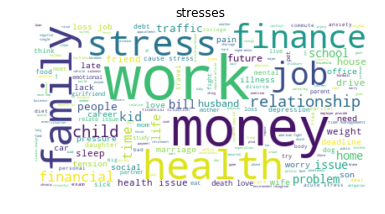

In [12]:
# visualize stresses
wordcloud = WordCloud(background_color='white').\
    generate(' '.join([' '.join(line) for line in corpus]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('stresses')
plt.show()

In [13]:
word_counts = Counter([item for sublist in corpus for item in sublist])

In [14]:
word_counts.most_common(30)

[('work', 296),
 ('money', 219),
 ('health', 120),
 ('family', 114),
 ('stress', 99),
 ('job', 79),
 ('finance', 72),
 ('relationship', 58),
 ('child', 55),
 ('financial', 49),
 ('issue', 49),
 ('time', 46),
 ('kid', 36),
 ('problem', 32),
 ('home', 32),
 ('school', 31),
 ('bill', 29),
 ('life', 26),
 ('traffic', 24),
 ('people', 23),
 ('house', 21),
 ('husband', 21),
 ('love', 20),
 ('future', 20),
 ('loss', 18),
 ('friend', 18),
 ('sleep', 16),
 ('drive', 16),
 ('weight', 16),
 ('car', 14)]

In [15]:
sorted(word_counts.most_common(), key=lambda x:x[1])

[('high', 1),
 ('dinner', 1),
 ('party', 1),
 ('end', 1),
 ('rude', 1),
 ('off', 1),
 ('phobia', 1),
 ('height', 1),
 ('mama', 1),
 ('tame', 1),
 ('exame', 1),
 ('dangerous', 1),
 ('area', 1),
 ('tired', 1),
 ('sex', 1),
 ('morning', 1),
 ('confusion', 1),
 ('toxic', 1),
 ('failure', 1),
 ('pian', 1),
 ('routine', 1),
 ('education', 1),
 ('overload', 1),
 ('lateness', 1),
 ('role', 1),
 ('ambiguity', 1),
 ('turmoil', 1),
 ('jobless', 1),
 ('unmet', 1),
 ('headache', 1),
 ('country', 1),
 ('o', 1),
 ('fear', 1),
 ('harrassment', 1),
 ('financially', 1),
 ('month', 1),
 ('related', 1),
 ('great', 1),
 ('course', 1),
 ('fund', 1),
 ('tarket', 1),
 ('mark', 1),
 ('coworker', 1),
 ('internship', 1),
 ('sugar', 1),
 ('troublesome', 1),
 ('daily', 1),
 ('special', 1),
 ('stranger', 1),
 ('write', 1),
 ('recent', 1),
 ('compulsion', 1),
 ('decision', 1),
 ('police', 1),
 ('officer', 1),
 ('useless', 1),
 ('item', 1),
 ('afasfadf', 1),
 ('duty', 1),
 ('organize', 1),
 ('reasonable', 1),
 ('tent

In [16]:
# topic modeling
dictionary = corpora.Dictionary(corpus)

# bag of words
corpora_bow = [dictionary.doc2bow(text) for text in corpus]

In [17]:
# tfidf
tfidf = models.TfidfModel(corpora_bow)

In [18]:
lsa = models.LdaModel(tfidf[corpora_bow], id2word=dictionary, num_topics=8)

In [19]:
lsa.print_topics(8)

[(0,
  '0.247*"work" + 0.141*"bill" + 0.071*"kid" + 0.039*"traffic" + 0.034*"holiday" + 0.030*"cook" + 0.027*"health" + 0.023*"\'s" + 0.020*"family" + 0.012*"stress"'),
 (1,
  '0.112*"job" + 0.065*"life" + 0.052*"sleep" + 0.045*"drink" + 0.045*"organization" + 0.044*"work" + 0.037*"social" + 0.034*"love" + 0.031*"stressor" + 0.030*"money"'),
 (2,
  '0.270*"money" + 0.041*"parenting" + 0.040*"expectation" + 0.039*"boredom" + 0.032*"death" + 0.029*"public" + 0.029*"donald" + 0.028*"son" + 0.028*"sister" + 0.027*"trump"'),
 (3,
  '0.074*"future" + 0.066*"fail" + 0.065*"safe" + 0.046*"status" + 0.039*"society" + 0.034*"work" + 0.029*"life" + 0.017*"relationship" + 0.009*"family" + 0.007*"office"'),
 (4,
  '0.157*"family" + 0.057*"house" + 0.042*"home" + 0.039*"traffic" + 0.036*"son" + 0.036*"emotional" + 0.036*"society" + 0.032*"problem" + 0.030*"dirty" + 0.027*"play"'),
 (5,
  '0.074*"girlfriend" + 0.042*"school" + 0.037*"n" + 0.036*"winter" + 0.036*"distance" + 0.036*"tooth" + 0.036*"hom

In [20]:
for doc in lsa[tfidf[corpora_bow]]:
    print(max(doc, key=lambda x: x[1]))

(2, 0.6024968)
(3, 0.56242484)
(2, 0.56247234)
(4, 0.5624629)
(2, 0.5624725)
(5, 0.48999292)
(0, 0.54241407)
(0, 0.56231225)
(1, 0.6305481)
(1, 0.46533707)
(1, 0.40805113)
(0, 0.5624308)
(0, 0.4541836)
(2, 0.56248045)
(0, 0.6256829)
(5, 0.56215084)
(5, 0.5624778)
(0, 0.56243074)
(7, 0.56249493)
(6, 0.5625)
(0, 0.56243074)
(7, 0.56234175)
(0, 0.4017061)
(3, 0.56249845)
(1, 0.661627)
(7, 0.6288805)
(2, 0.5624725)
(4, 0.6375583)
(4, 0.5624475)
(2, 0.56247294)
(4, 0.562391)
(4, 0.6340943)
(7, 0.56233793)
(6, 0.5623701)
(0, 0.56243074)
(0, 0.56243074)
(7, 0.6782334)
(0, 0.5624308)
(2, 0.5624716)
(0, 0.56243074)
(3, 0.56242484)
(0, 0.56246626)
(7, 0.56232476)
(2, 0.5624702)
(0, 0.56243074)
(3, 0.56248796)
(2, 0.5624971)
(2, 0.5624724)
(2, 0.5624721)
(6, 0.69979084)
(0, 0.56243074)
(1, 0.56248724)
(6, 0.5623707)
(0, 0.56243074)
(7, 0.4849817)
(3, 0.67001945)
(0, 0.5624964)
(5, 0.42505875)
(2, 0.56247205)
(4, 0.5624891)
(1, 0.5624147)
(0, 0.5624308)
(2, 0.5624726)
(7, 0.39189917)
(1, 0.5624367

(0, 0.56243074)
(1, 0.6344127)
(2, 0.56244195)
(0, 0.5624307)
(4, 0.5624967)
(0, 0.56243074)
(7, 0.56234187)
(1, 0.5099243)
(5, 0.56245446)
(2, 0.562473)
(0, 0.5624664)
(4, 0.5623098)
(0, 0.5624764)
(7, 0.5622611)
(7, 0.56249756)
(7, 0.5624891)
(0, 0.56243074)
(2, 0.56247216)
(7, 0.56249905)
(0, 0.5624245)
(2, 0.5624728)
(2, 0.56247264)
(4, 0.57419294)
(1, 0.40747738)
(3, 0.4434545)
(7, 0.62774456)
(2, 0.56247)
(7, 0.5623289)
(2, 0.56247234)
(1, 0.5624372)
(3, 0.56249285)
(0, 0.56243074)
(2, 0.5624209)
(0, 0.5624308)
(4, 0.5624467)
(7, 0.5623424)
(2, 0.56247866)
(4, 0.56244725)
(0, 0.5624984)
(2, 0.5624721)
(2, 0.56246954)
(4, 0.37521535)
(7, 0.5624891)
(0, 0.56243074)
(7, 0.6338936)
(3, 0.62945974)
(2, 0.5624717)
(2, 0.45853454)
(3, 0.56249845)
(2, 0.56244224)
(0, 0.62739426)
(0, 0.56243074)
(1, 0.56243527)
(3, 0.631431)
(0, 0.5624307)
(7, 0.34482574)
(4, 0.5624472)
(3, 0.6365128)
(0, 0.56243074)
(2, 0.33626598)
(2, 0.56247234)
(0, 0.63512653)
(0, 0.56243074)
(1, 0.61250436)
(4, 0.562

(1, 0.6701109)
(7, 0.67116106)
(6, 0.56235605)
(5, 0.39225298)
(2, 0.31481588)
(7, 0.6371484)
(2, 0.5624971)
(1, 0.63696355)
(2, 0.5624723)
(0, 0.6256493)
(0, 0.63725984)
(3, 0.7047184)
(1, 0.6363105)
(4, 0.5624806)
(1, 0.40796238)
(2, 0.56247157)
(1, 0.3823085)
(0, 0.56243074)
(1, 0.61250174)
(5, 0.486788)
(1, 0.6688612)
(0, 0.5624308)
(0, 0.6139274)
(7, 0.56236356)
(3, 0.56238896)
(2, 0.5625)
(0, 0.5624307)
(6, 0.5624571)
(4, 0.5624445)
(2, 0.637443)
(0, 0.5624984)
(1, 0.5624376)
(6, 0.5624826)
(4, 0.5624807)
(2, 0.679415)
(3, 0.56249106)
(5, 0.5624992)
(6, 0.56245476)
(5, 0.5624283)
(2, 0.56247264)
(0, 0.56243074)
(4, 0.56242496)
(2, 0.5624971)
(7, 0.63718796)
(0, 0.43961746)
(3, 0.6162894)
(2, 0.43123227)
(6, 0.5624826)
(0, 0.56243074)
(6, 0.5624727)
(5, 0.5624063)
(0, 0.5624664)
(0, 0.5624308)
(1, 0.56241345)
(7, 0.56226164)
(0, 0.562294)
(3, 0.5624995)
(1, 0.41784325)
(0, 0.5624662)
(2, 0.56247234)
(0, 0.43962616)
(1, 0.67713094)
(6, 0.562496)
(0, 0.6320608)
(7, 0.5623381)
(0, 0.

(6, 0.56245536)
(7, 0.56249493)
(6, 0.5624574)
(6, 0.5624573)
(5, 0.5624508)
(7, 0.56249756)
(4, 0.5624968)
(5, 0.5624751)
(3, 0.5623932)
(2, 0.5624717)
(4, 0.5624492)
(2, 0.5625)
(2, 0.56247187)
(2, 0.5624245)
(7, 0.4311024)
(6, 0.5624742)
(3, 0.56239676)
(6, 0.5623579)
(7, 0.47751844)
(3, 0.5623956)
(3, 0.6364939)
(4, 0.5624463)
(0, 0.56243074)
(7, 0.5623511)
(5, 0.5624511)
(6, 0.56245816)
(2, 0.56247216)
(2, 0.42586455)
(1, 0.6261311)
(4, 0.4400709)
(7, 0.3605325)
(0, 0.75831753)
(0, 0.56243074)
(0, 0.63248)
(0, 0.56246626)
(6, 0.56235135)
(5, 0.5624988)
(6, 0.56245625)
(2, 0.562472)
(7, 0.56233954)
(4, 0.5624967)
(3, 0.6748474)
(7, 0.34823182)
(2, 0.56247234)
(5, 0.56242865)
(7, 0.56240153)
(7, 0.562423)
(6, 0.5625)
(3, 0.5624354)
(7, 0.56248903)
(0, 0.5624308)
(6, 0.5623503)
(0, 0.6257018)
(6, 0.63722265)
(4, 0.5624569)
(5, 0.5624509)
(2, 0.56247145)
(6, 0.63153017)
(6, 0.56246024)
(5, 0.56247574)
(2, 0.63725674)
(1, 0.5624702)
(3, 0.41849032)
(1, 0.5624975)
(2, 0.43298087)
(4, 0.

# Explore Examples

In [21]:
examples = examples.apply(lambda x: x.lower())

In [22]:
def run_pipeline(doc_list, chart_title, topics):
    
    doc_list.apply(lambda x: x.lower())
    
    # create corpus
    corpus = []
    for line in doc_list.tolist():
        doc = nlp(line)
        corpus.append(tokenize_text(doc))
        
    # visualize
    wordcloud = WordCloud(background_color='white').\
    generate(' '.join([' '.join(line) for line in corpus]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(chart_title)
    plt.show()
    
    word_counts = Counter([item for sublist in corpus for item in sublist])
    
    # topic modeling
    dictionary = corpora.Dictionary(corpus)

    # bag of words
    corpora_bow = [dictionary.doc2bow(text) for text in corpus]
    
    # tfidf
    tfidf = models.TfidfModel(corpora_bow, normalize=True)
    
    # lda model
    lda = models.LdaModel(tfidf[corpora_bow], id2word=dictionary, num_topics=topics)   
        
    return corpus, word_counts, dictionary, corpora_bow, tfidf, lda

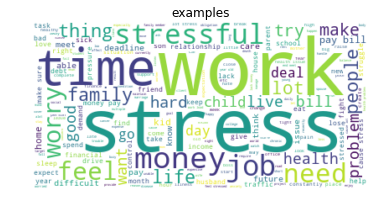

In [23]:
corpus, word_counts, dictionary, corpora_bow, tfidf, lda = run_pipeline(examples, 'examples', 8)

In [24]:
def analyze_word_counts(word_counts, max_num=30, min_num=30):
    print('most popular \n', word_counts.most_common(max_num), '\n') # most common
    print('least popular \n', sorted(word_counts.most_common(), key=lambda x:x[1])[0:min_num]) # least common

In [25]:
analyze_word_counts(word_counts)

most popular 
 [('stress', 268), ('work', 264), ('time', 194), ('not', 173), ('money', 172), ('be', 127), ('job', 117), ('stressful', 108), ('feel', 102), ('pay', 100), ('have', 100), ('family', 99), ('need', 96), ('lot', 94), ('thing', 92), ('bill', 91), ('worry', 86), ('make', 83), ('life', 81), ('like', 81), ('people', 79), ('health', 73), ('get', 67), ('day', 66), ('try', 62), ('problem', 59), ('hard', 53), ('want', 53), ('good', 48), ('live', 47)] 

least popular 
 [('carrier', 1), ('noice', 1), ('proximity', 1), ('bout', 1), ('explanation', 1), ('unkind', 1), ('insecurity', 1), ('environnement', 1), ('regard', 1), ('comfortably', 1), ('impolite', 1), ('request', 1), ('productivity', 1), ('th', 1), ('floor', 1), ('building', 1), ('depleted', 1), ('direct', 1), ('contact', 1), ('costumer', 1), ('computer', 1), ('feed', 1), ('40', 1), ('mile', 1), ('foolishness', 1), ('foundation', 1), ('paramount', 1), ('projcect', 1), ('deliver', 1), ('usual', 1)]


In [26]:
lda.print_topics(8)

[(0,
  '0.036*"not" + 0.025*"time" + 0.021*"stress" + 0.018*"crazy" + 0.015*"swell" + 0.015*"trap" + 0.014*"unbearable" + 0.013*"find" + 0.013*"project" + 0.013*"specific"'),
 (1,
  '0.032*"late" + 0.025*"manage" + 0.019*"care" + 0.018*"paycheck" + 0.018*"everyday" + 0.018*"son" + 0.018*"try" + 0.016*"expense" + 0.014*"organize" + 0.013*"recently"'),
 (2,
  '0.039*"friend" + 0.038*"bill" + 0.030*"job" + 0.024*"pay" + 0.021*"not" + 0.020*"work" + 0.018*"able" + 0.018*"stressful" + 0.017*"anger" + 0.017*"ask"'),
 (3,
  '0.034*"worry" + 0.028*"family" + 0.026*"expectation" + 0.019*"time" + 0.017*"responsibility" + 0.016*"job" + 0.016*"meet" + 0.016*"situation" + 0.015*"hand" + 0.015*"ignore"'),
 (4,
  '0.041*"earn" + 0.024*"need" + 0.020*"uncertain" + 0.020*"unreasonable" + 0.017*"date" + 0.017*"prepare" + 0.016*"relative" + 0.016*"plan" + 0.015*"future" + 0.014*"work"'),
 (5,
  '0.031*"like" + 0.022*"single" + 0.017*"time" + 0.017*"wall" + 0.017*"not" + 0.016*"irritate" + 0.016*"educatio

# Explore Strategy

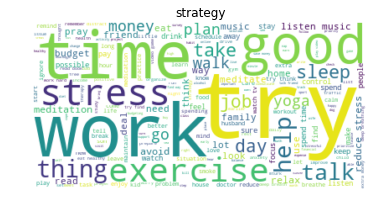

In [27]:
corpus, word_counts, dictionary, corpora_bow, tfidf, lda = run_pipeline(strategy, 'strategy', 8)

In [28]:
analyze_word_counts(word_counts, 100, 50)

most popular 
 [('try', 287), ('work', 186), ('time', 158), ('stress', 119), ('exercise', 83), ('good', 82), ('help', 73), ('talk', 73), ('not', 71), ('thing', 70), ('money', 66), ('reduce', 60), ('music', 60), ('be', 57), ('listen', 56), ('take', 56), ('job', 54), ('sleep', 52), ('day', 50), ('plan', 49), ('walk', 49), ('think', 49), ('spend', 48), ('friend', 45), ('watch', 44), ('find', 41), ('yoga', 40), ('eat', 40), ('family', 40), ('go', 39), ('budget', 39), ('read', 37), ('meditation', 36), ('relax', 35), ('pray', 34), ('way', 34), ('avoid', 34), ('get', 34), ('make', 33), ('drink', 32), ('use', 30), ('meditate', 29), ('deep', 29), ('extra', 28), ('deal', 28), ('away', 28), ('look', 28), ('home', 28), ('like', 27), ('play', 27), ('healthy', 27), ('pay', 27), ('mind', 26), ('need', 26), ('sure', 26), ('lot', 26), ('possible', 25), ('people', 25), ('to', 24), ('control', 23), ('food', 23), ('keep', 23), ('do', 22), ('focus', 22), ('feel', 22), ('calm', 22), ('stay', 22), ('breathin

# Similarity Approach LDA latent features

In [29]:
quote = "go to do exercise whenever can and work out and do some exercise"

In [30]:
bow_quote = dictionary.doc2bow(tokenize_text(nlp(quote)))

In [31]:
tfidf_quote = tfidf[bow_quote]

In [32]:
index = similarities.MatrixSimilarity(lda[tfidf[corpora_bow]])

In [33]:
similar_docs = sorted(list(enumerate(index[lda[tfidf_quote]])), key=lambda x:-x[1])

In [34]:
strategy[[x[0] for x in similar_docs[0:20]]]

454                                       Time management
583                                       time management
1547                                  performing exercise
284                                            Side jobs 
106                                             work hard
206                                         Spend wisely.
783                                      dont dwell on it
89                              Try not to think about it
134                           I try not to think about it
717     Try to think that there is nothing that can be...
1489                            Try not to think about it
1908                            try not to think about it
2035                     Try not to think of him so much.
1639                        Trying not to think about it.
698                                   don't procrastinate
1612                                         job pressure
1911                                      Going to church
382           

# GloVe approach

In [35]:
doc1 = nlp('I want to go to the gym')
doc2 = nlp("I only go to the gym when I am free")
doc3 = nlp('This is a zebra at the zoo')

print(doc1.similarity(doc2))
print(doc1.similarity(doc3))

0.9389000618057138
0.7155503451549461


In [36]:
# find the best matching strategy to the phrase
results = []
doc2 = nlp('I smoke and take drugs')
for s in strategy:
    doc1 = nlp(s)
    results.append(doc1.similarity(doc2))

In [37]:
best_matches = sorted(list(enumerate(results)), key=lambda x:-x[1])[0:30]

In [38]:
for result in strategy[[x[0] for x in best_matches]]:
    print(result)

i take drugs
I fo to the doctor and take medications.
I use a cane and take prescription pain medication to deal with the pain. 
I take anit anxiety medication to help me cope with reducing the symptoms of my anxiety . I also like taking long hot baths that is something that always makes me feels better.
i take weed to calm down
For one thing,I have to look away whenever I am giving blood. I also try to regulate my breathing so I dont pass out.
i use bathroom i have used before and i know are safe.
I smoke to relax.
Doing drugs could get your mind off things.
I try to stay calm and take time off when I can and do yoga
I usually used to ignore family problems that cause me stress and take a good sleep.
i use a lot of alcohol
I usually have a few alcoholic beverages then I don't care as much
I rest in bed and try not to avoid nasty people
I take medication for anxiety
I do some home treatment and get relaxed.
i spend time with my friends to drink and smoke at night.
I have pills from a D

In [39]:
df.head()

,Stress1,Stress1Ex,Stress2,Stress2Ex,Stress3,Stress3Ex,Strategy1,Strategy2,Strategy3
0,HIGH WORK PRESSURE,BECAUSE OF HIS ONES CARRIER,LIMITED SLEEP,BECAUSE OF ONES FAMILY ATMOSPHERE,ANGRY ALL TIMES,BECAUSE OF HIS ONES BEHAVIOR,TO BE HAPPY,TO CHAT WITH FRIENDS,TO CHAT WITH LOVER
1,Deadlines,When I am working on a tight deadline.,Money,When I am not sure if I am going to be able to...,Sleep,Not having enough sleep.,I am trying to better plan and organize so I a...,I don't really have a strategy for this except...,Making sure I have enough sleep every day.
2,Money,I owe bills I cannot pay.,Career,I should have a more fulfilling job.,Weight,I should be slimmer because it affects my heal...,I go for long walks every day.,I meditate 20 minutes a day.,I listen to upbeat podcasts.
3,Crowds,"Because of the amount of noice,and people at c...",Loud Music,As I can't hear anyone,Conflict,As don't know how to resolve,Tend to take routes/public transport with leas...,Choose pubs/bars without loud music,Avoid conflicts with other people
4,Money,Worrying a bout having enough money to pay bills,Children,Worry about if they are going to be good in sc...,Adult children,Worry about if they are gonna make it home safe.,I try to take things one day at a time,I try to think possitive thoughts and prepare ...,I have them call me when they go any where so ...


In [40]:
short_phrases = pd.concat([df['Stress1'],
                     df['Stress2'], 
                     df['Stress3']]).reset_index(drop=True)

long_phrases = pd.concat([df['Stress1Ex'],
                     df['Stress2Ex'], 
                     df['Stress3Ex']]).reset_index(drop=True)

In [41]:
strategy = pd.concat([df['Strategy1'], 
                      df['Strategy2'], 
                      df['Strategy3']]).reset_index(drop=True)

In [42]:
def find_similar_phrase(search_phrase, phrases):
    results = []
    doc2 = nlp(search_phrase)
    for phrase in phrases:
        doc1 = nlp(phrase)
        results.append(doc1.similarity(doc2))
        
    return results

In [58]:
# find the best matching strategy to the phrase
similar_phrase = "I can't get a simple break"

if len(similar_phrase.split(' ')) < 5:
    results = find_similar_phrase(similar_phrase, short_phrases)
else:
    results = find_similar_phrase(similar_phrase, long_phrases)

best_matches = sorted(list(enumerate(results)), key=lambda x:-x[1])[0:5]

for result in [x[0] for x in best_matches]:
    print('strategy:', strategy[result])
    
    if len(similar_phrase.split(' ')) < 5:
        print('matching short phrase:', short_phrases[result])
    else:
        print('matching long phrase:', long_phrases[result])
    print()

strategy: try to get rest
matching long phrase: sometimes I just feel I do not get a break

strategy: taking deep breaths
matching long phrase: i don't make a lot

strategy: i walk away
matching long phrase: sometimes you just need a break

strategy: Try to anticipate what's going to be required of me beforehand so I'm ready for it, and always remember to be malleable
matching long phrase: there is always something going on here, somebody needs me to do something I can't do or be somewhere I can't be

strategy: finance education courses
matching long phrase: I stress when I'm in a financial rut and can't seem to catch up



# Clustering with KMeans

In [44]:
vectors = []
for phrase in short_phrases:
    vectors.append(nlp(phrase).vector)

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

random_state = 5

scaler = StandardScaler()
scaled_vectors = scaler.fit_transform(vectors)

inertia = []
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, random_state=random_state).fit(scaled_vectors)
    inertia.append(kmeans.inertia_)

Text(0.5,1,'Inertia vs number of cluster')

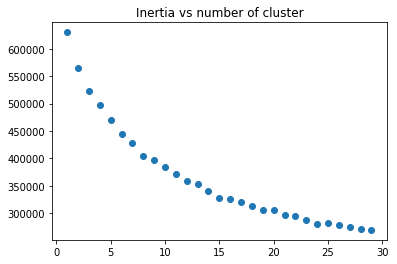

In [46]:
plt.scatter(range(1, len(inertia)+1), inertia)
plt.title('Inertia vs number of cluster')

In [47]:
kmeans = KMeans(n_clusters=15, random_state=random_state).fit(scaled_vectors)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(scaled_vectors)

In [49]:
x = pca_vectors[:,0]
y = pca_vectors[:,1]

kmean_results = pd.DataFrame({'phrases':short_phrases, 'labels':kmeans.labels_, 'pca_x':x, 'pca_y':y})

Cluster:  0


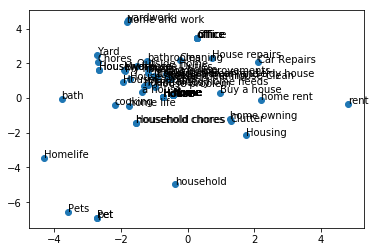

Cluster:  1


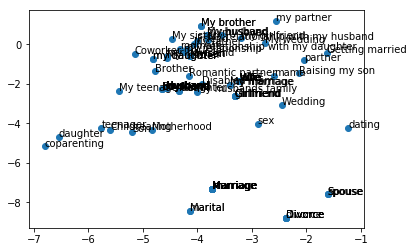

Cluster:  2


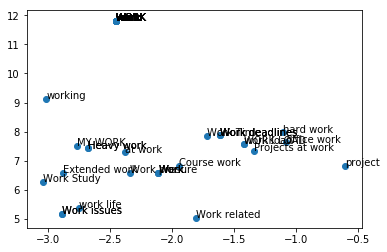

Cluster:  3


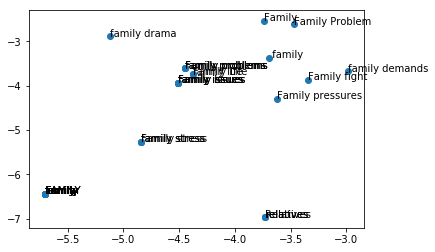

Cluster:  4


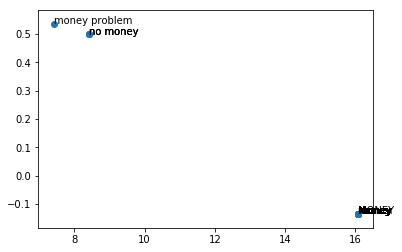

Cluster:  5


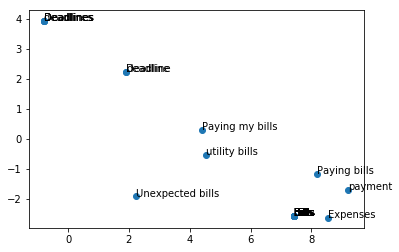

Cluster:  6


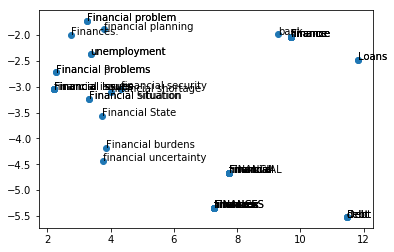

Cluster:  7


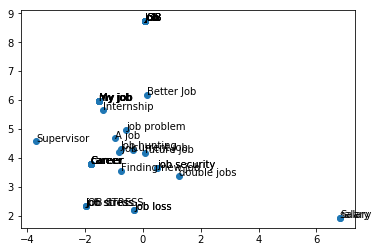

Cluster:  8


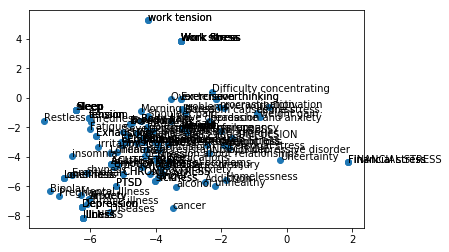

Cluster:  9


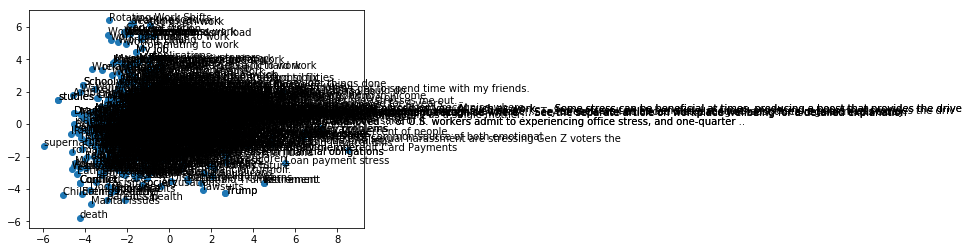

Cluster:  10


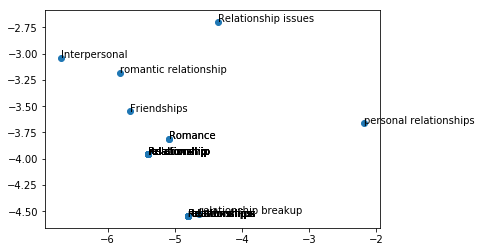

Cluster:  11


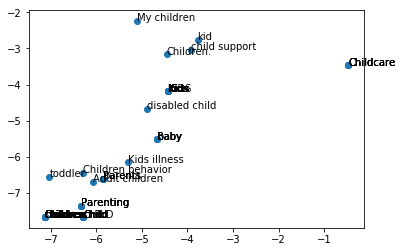

Cluster:  12


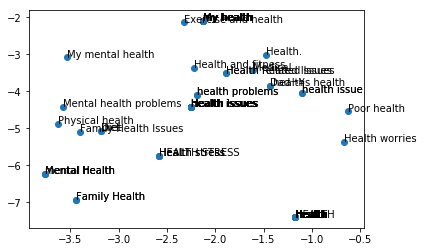

Cluster:  13


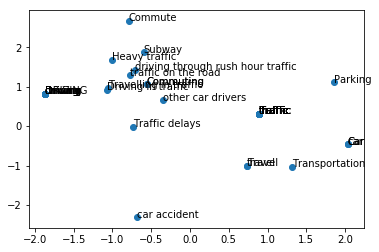

Cluster:  14


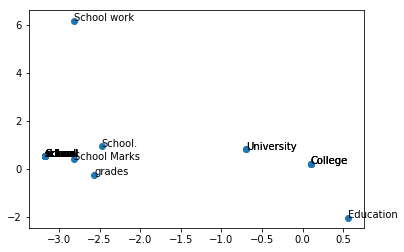

In [50]:
for cluster in np.unique(kmeans.labels_):
    graph = kmean_results[kmean_results['labels'] == cluster].reset_index()
    fig, ax = plt.subplots()
    ax.scatter(graph.pca_x, graph.pca_y)
    print('Cluster: ', cluster)
    for i, txt in enumerate(graph.phrases):
        ax.annotate(txt, (graph.loc[i, 'pca_x'], graph.loc[i, 'pca_y']))
    plt.show()

# Redo Cluster 9

In [51]:
nine_data = kmean_results[kmean_results.labels == 9].copy()
nine = nine_data.index

In [53]:
inertia = []
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, random_state=random_state).fit(scaled_vectors[nine])
    inertia.append(kmeans.inertia_)

Text(0.5,1,'Inertia vs number of cluster')

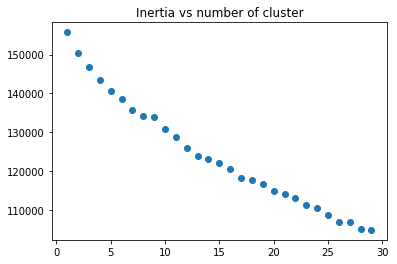

In [54]:
plt.scatter(range(1, len(inertia)+1), inertia)
plt.title('Inertia vs number of cluster')

In [55]:
kmeans_nine = KMeans(n_clusters=12, random_state=random_state).fit(scaled_vectors[nine])

In [56]:
nine_data['new_label'] = kmeans_nine.labels_

Cluster:  0


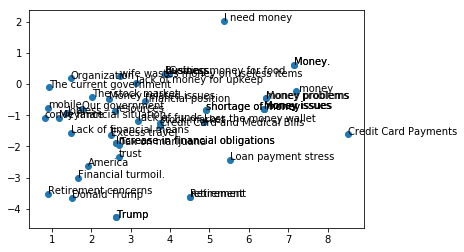

Cluster:  1


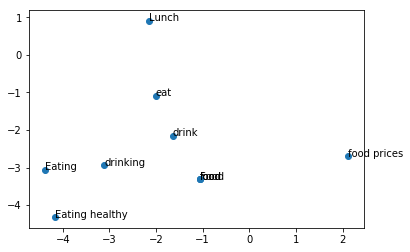

Cluster:  2


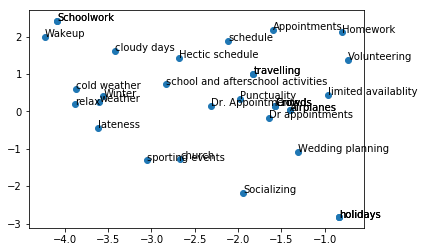

Cluster:  3


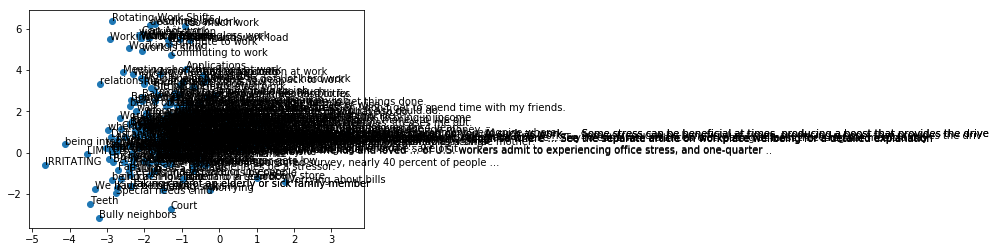

Cluster:  4


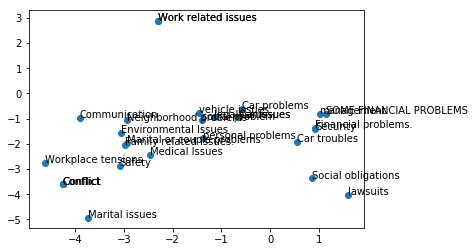

Cluster:  5


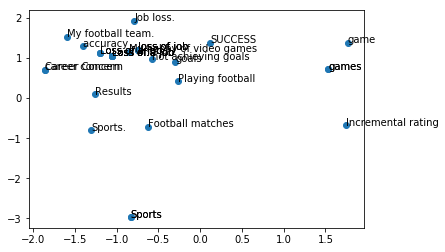

Cluster:  6


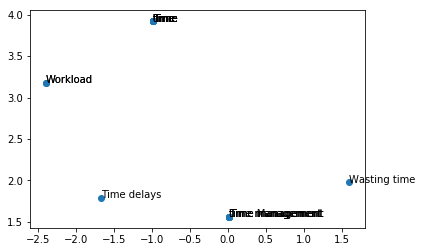

Cluster:  7


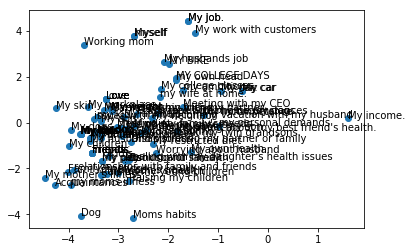

Cluster:  8


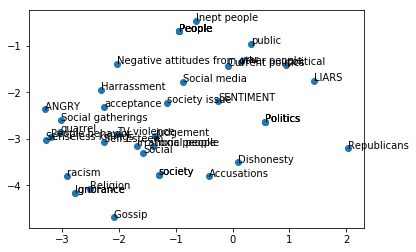

Cluster:  9


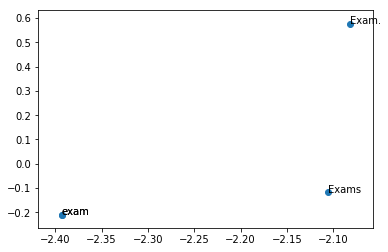

Cluster:  10


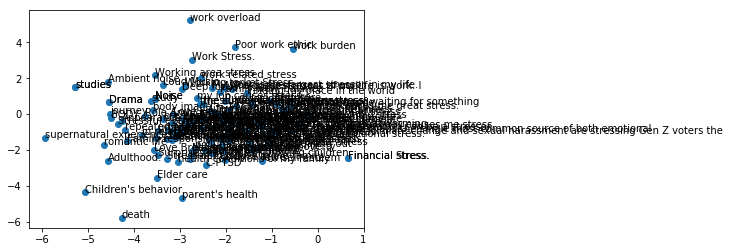

Cluster:  11


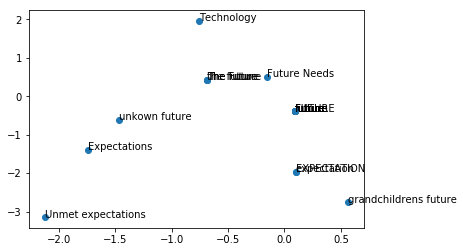

In [57]:
for cluster in np.unique(kmeans_nine.labels_):
    graph = nine_data[nine_data['new_label'] == cluster].reset_index()
    fig, ax = plt.subplots()
    ax.scatter(graph.pca_x, graph.pca_y)
    print('Cluster: ', cluster)
    for i, txt in enumerate(graph.phrases):
        ax.annotate(txt, (graph.loc[i, 'pca_x'], graph.loc[i, 'pca_y']))
    plt.show()